In [95]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')
manual_dir = os.path.join(base_dir, 'manual')
landing_dir = os.path.join(base_dir, 'landing')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [97]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_unpreprocessed.csv")

In [98]:
df.head(5)

,Unnamed: 0,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,...,crime 2026,crime 2027,CBD Distance,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance
0,0,"8/90 Hambleton Street, Middle Park VIC 3206",410.0,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,...,8881.956296,8881.954913,4.9721,4.2640,3.1100,3.6124,0.4270,0.1886,0.5198,1.6056
1,1,"3/33 Bevan Street, Albert Park VIC 3206",550.0,Apartment,1,1,-37.839959,144.956373,Albert Park College,0.9 km away,...,8881.956296,8881.954913,4.0862,4.7513,2.2242,2.0958,0.2448,0.1982,0.2416,0.7198
2,3,"7/7-9 Faussett Street, Albert Park VIC 3206",490.0,Apartment,1,1,-37.841670,144.955332,Albert Park College,0.8 km away,...,8881.956296,8881.954913,4.4456,4.5995,2.5835,1.9441,0.0756,0.1749,0.1316,1.0792
3,4,Albert Park VIC 3206,1280.0,Apartment,1,1,-37.843861,144.951454,Albert Park College,0.4 km away,...,8881.956296,8881.954913,4.7979,4.9483,2.0891,2.2929,0.5661,0.1422,0.3968,1.4315
4,5,"214/363 Beaconsfield Parade, Middle Park VIC 3206",350.0,Apartment,1,1,-37.854035,144.961308,Albert Park College,1.6 km away,...,8881.956296,8881.954913,5.8848,4.2357,4.0227,3.5144,0.6409,0.5429,0.3927,2.2451


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6283 non-null   int64  
 1   Address                       6283 non-null   object 
 2   Cost                          6283 non-null   float64
 3   Property Type                 6283 non-null   object 
 4   Bedrooms                      6283 non-null   int64  
 5   Bathrooms                     6283 non-null   int64  
 6   Latitude                      6283 non-null   float64
 7   Longitude                     6283 non-null   float64
 8   Closest Gov Secondary School  5468 non-null   object 
 9   Gov Secondary Distance        5468 non-null   object 
 10  Age under 20                  6210 non-null   object 
 11  Age 20-39                     6210 non-null   object 
 12  Age 40-59                     6210 non-null   object 
 13  Age

# Preprocessing

In [100]:
df.shape

(6283, 37)

In [101]:
# duplicate record
duplicate_rows = df[df.duplicated()]
print(f"duplicate records: {duplicate_rows.shape[0]}")

duplicate records: 0


In [102]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(6283, 37)

# Remove unvalid records
- unvalid address
- zero value in number of bedrooms or bathrooms

In [103]:
# Use a regular expression to find rows where the address matches the condition
# The condition is: the last four characters are digits, and the rest of the address has no digits
df_filtered = df_cleaned[~df_cleaned['Address'].str.match(r'^[^\d]*\d{4}$')]

print(df_filtered)


      Unnamed: 0                                            Address   Cost  \
0              0        8/90 Hambleton Street, Middle Park VIC 3206  410.0   
1              1            3/33 Bevan Street, Albert Park VIC 3206  550.0   
2              3        7/7-9 Faussett Street, Albert Park VIC 3206  490.0   
4              5  214/363 Beaconsfield Parade, Middle Park VIC 3206  350.0   
5              6          2/72 Withers Street, Albert Park VIC 3206  450.0   
...          ...                                                ...    ...   
6278        7454                  4 Unaipon Street, Leneva VIC 3691  620.0   
6279        7455                    1 Chatham Road, Leneva VIC 3691  600.0   
6280        7456              8 Roycroft Street, Baranduda VIC 3691  620.0   
6281        7457             20 WOODBRIDGE STREET, Killara VIC 3691  800.0   
6282        7458            17 Freeman Crescent, Baranduda VIC 3691  750.0   

     Property Type  Bedrooms  Bathrooms   Latitude   Longitude 

In [104]:
# Remove rows where 'Bedrooms' or 'Bathrooms' columns have a value of 0
filtered_df = df_filtered[(df_filtered['Bedrooms'] != 0) & (df_filtered['Bathrooms'] != 0)]

filtered_df.shape

(6253, 37)

In [105]:
filtered_df.describe()

,Unnamed: 0,Cost,Bedrooms,Bathrooms,Latitude,Longitude,Postcode,SA2_CODE21,population 2024,population 2025,...,crime 2026,crime 2027,CBD Distance,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance
count,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6.251000e+03,6251.000000,6251.000000,...,5948.000000,5948.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000
mean,3722.272829,571.093398,2.506157,1.419479,-37.757466,144.899736,3199.128578,2.083680e+08,16531.789154,16697.682692,...,6642.461542,6644.358550,42.296350,42.879327,7.472596,3.310816,2.475606,0.797893,8.203749,1.864460
std,2193.957284,185.390895,0.942952,0.553692,0.812968,2.653713,224.947574,3.582802e+06,5058.401365,5201.548528,...,2922.073701,2921.601809,71.002002,71.738283,7.305866,3.887519,6.778324,0.907349,11.188946,1.980868
min,0.000000,100.000000,1.000000,1.000000,-38.477668,0.000000,3000.000000,2.010110e+08,77.963190,77.928959,...,2105.686481,2118.582490,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1764.000000,460.000000,2.000000,1.000000,-37.893149,144.897926,3058.000000,2.060415e+08,13019.575862,13083.350696,...,4550.649204,4551.133558,8.678100,9.515200,3.472600,1.309000,1.144100,0.369600,3.076800,0.923300
50%,3734.000000,550.000000,3.000000,1.000000,-37.822328,144.999012,3141.000000,2.080112e+08,16082.620280,16141.870946,...,6047.923238,6062.792597,17.500000,17.917000,5.802000,2.248300,1.796900,0.605800,6.178700,1.481500
75%,5620.000000,650.000000,3.000000,2.000000,-37.763504,145.114350,3204.000000,2.120216e+08,20288.028371,20330.068927,...,7951.434057,7957.710340,41.004200,38.695900,8.732000,3.890900,2.803900,0.954600,11.093000,2.273600
max,7458.000000,1290.000000,4.000000,4.000000,0.000000,147.655880,3977.000000,2.170415e+08,36077.584094,40178.279432,...,14389.538764,14389.549951,545.902800,553.583700,75.432400,102.731000,213.037000,19.824700,210.973200,39.559600


# Simplified data
Clean the following features, only leave numerical values:

'Gov Secondary Distance', 'Age under 20', 'Age 20-39', 'Age 40-59', and 'Age 60+'

In [106]:
filtered_df.iloc[1]

Unnamed: 0                                                            1
Address                         3/33 Bevan Street, Albert Park VIC 3206
Cost                                                              550.0
Property Type                                                 Apartment
Bedrooms                                                              1
Bathrooms                                                             1
Latitude                                                     -37.839959
Longitude                                                    144.956373
Closest Gov Secondary School                        Albert Park College
Gov Secondary Distance                                      0.9 km away
Age under 20                                                        28%
Age 20-39                                                           18%
Age 40-59                                                           28%
Age 60+                                                         

In [107]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Function to extract the numeric part from 'Gov Secondary Distance', and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
filtered_df.iloc[1]


/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_96355/2054363305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))


Unnamed: 0                                                                1
Address                             3/33 Bevan Street, Albert Park VIC 3206
Cost                                                                  550.0
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.839959
Longitude                                                        144.956373
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          0.9 km away
Age under 20                                                            28%
Age 20-39                                                               18%
Age 40-59                                                               28%
Age 60+     

In [108]:
# Rename numeric columnbs
df_drop = filtered_df.drop('Gov Secondary Distance', axis=1)
df_drop = df_drop.rename(columns={'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_drop.iloc[1]

Unnamed: 0                                                            1
Address                         3/33 Bevan Street, Albert Park VIC 3206
Cost                                                              550.0
Property Type                                                 Apartment
Bedrooms                                                              1
Bathrooms                                                             1
Latitude                                                     -37.839959
Longitude                                                    144.956373
Closest Gov Secondary School                        Albert Park College
Age under 20                                                        28%
Age 20-39                                                           18%
Age 40-59                                                           28%
Age 60+                                                             26%
Postcode                                                        

In [109]:
# Remove '%' symbol for columns 'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+'

# List of columns with percentage values
percentage_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

# Loop through each column to remove '%' symbol
df_drop[percentage_columns] = df_drop[percentage_columns].apply(lambda x: x.str.replace('%', ''))

# Display the updated dataframe
df_drop.head()


,Unnamed: 0,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,...,crime 2027,CBD Distance,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Gov Secondary Distance
0,0,"8/90 Hambleton Street, Middle Park VIC 3206",410.0,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,...,8881.954913,4.9721,4.2640,3.1100,3.6124,0.4270,0.1886,0.5198,1.6056,1.2
1,1,"3/33 Bevan Street, Albert Park VIC 3206",550.0,Apartment,1,1,-37.839959,144.956373,Albert Park College,28,...,8881.954913,4.0862,4.7513,2.2242,2.0958,0.2448,0.1982,0.2416,0.7198,0.9
2,3,"7/7-9 Faussett Street, Albert Park VIC 3206",490.0,Apartment,1,1,-37.841670,144.955332,Albert Park College,20,...,8881.954913,4.4456,4.5995,2.5835,1.9441,0.0756,0.1749,0.1316,1.0792,0.8
4,5,"214/363 Beaconsfield Parade, Middle Park VIC 3206",350.0,Apartment,1,1,-37.854035,144.961308,Albert Park College,19,...,8881.954913,5.8848,4.2357,4.0227,3.5144,0.6409,0.5429,0.3927,2.2451,1.6
5,6,"2/72 Withers Street, Albert Park VIC 3206",450.0,Apartment,1,1,-37.846316,144.947229,Albert Park College,27,...,8881.954913,5.2608,5.6176,2.2950,2.9621,1.1734,0.5890,0.6742,2.0388,0.2


# Missing value

In [110]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

number of missing value in each column：
Unnamed: 0                        0
Address                           0
Cost                              0
Property Type                     0
Bedrooms                          0
Bathrooms                         0
Latitude                          0
Longitude                         0
Closest Gov Secondary School    809
Age under 20                     73
Age 20-39                        73
Age 40-59                        73
Age 60+                          73
Postcode                          0
SA2_CODE21                        2
population 2024                   2
population 2025                   2
population 2026                   2
population 2027                   2
2024 income                       2
2025 income                       2
2026 income                       2
2027 income                       2
LGA_CODE24                        2
crime 2024                      305
crime 2025                      305
crime 2026              

In [111]:
# remove record with missing value
df_drop = df_drop.dropna()

In [112]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

number of missing value in each column：
Unnamed: 0                      0
Address                         0
Cost                            0
Property Type                   0
Bedrooms                        0
Bathrooms                       0
Latitude                        0
Longitude                       0
Closest Gov Secondary School    0
Age under 20                    0
Age 20-39                       0
Age 40-59                       0
Age 60+                         0
Postcode                        0
SA2_CODE21                      0
population 2024                 0
population 2025                 0
population 2026                 0
population 2027                 0
2024 income                     0
2025 income                     0
2026 income                     0
2027 income                     0
LGA_CODE24                      0
crime 2024                      0
crime 2025                      0
crime 2026                      0
crime 2027                      0
CBD Dist

# Remove Outlier

In [113]:
def plot_boxplots(df, feature):
    """
    Plots a box plot for a specified column in the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing numeric feature columns.
    feature (str): The column that you want to observe.
    """
    # Set up the figure
    plt.figure(figsize=(8, 6))

    # Boxplot for the feature
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [114]:
def outlier_remover(df, column_name):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method with a custom multiplier for N > 100.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    column_name (str): The name of the column from which to remove outliers.

    Returns:
    pandas.DataFrame: DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Get the number of records (N)
    N = len(df)
    
    # Apply the formula for N > 100
    multiplier = np.sqrt(np.log(N) - 0.5)
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the DataFrame to exclude outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

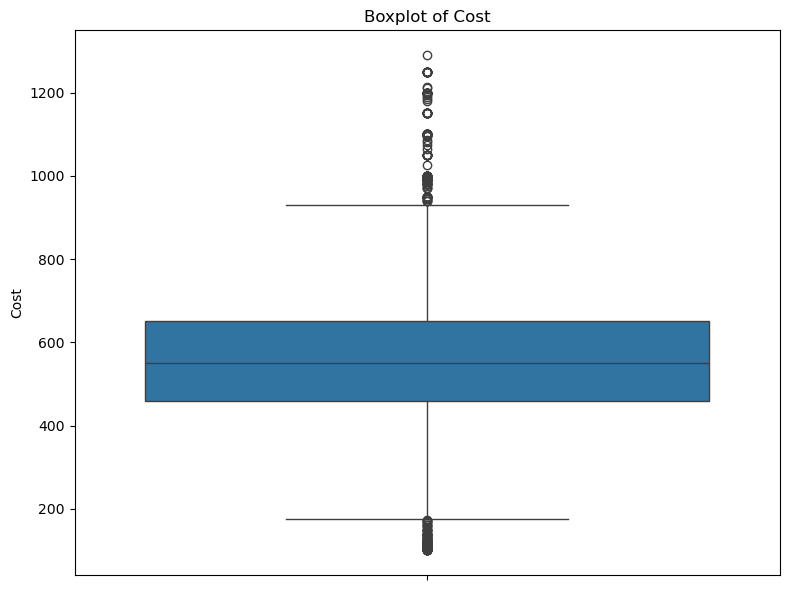

In [115]:
plot_boxplots(df_drop, 'Cost')

In [116]:
df_drop.shape

(5105, 37)

In [117]:
df_remove = outlier_remover(df_drop, 'Cost')
df_remove.shape

(5055, 37)

# Convert DataType

In [118]:
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5055 entries, 0 to 6276
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5055 non-null   int64  
 1   Address                       5055 non-null   object 
 2   Cost                          5055 non-null   float64
 3   Property Type                 5055 non-null   object 
 4   Bedrooms                      5055 non-null   int64  
 5   Bathrooms                     5055 non-null   int64  
 6   Latitude                      5055 non-null   float64
 7   Longitude                     5055 non-null   float64
 8   Closest Gov Secondary School  5055 non-null   object 
 9   Age under 20                  5055 non-null   object 
 10  Age 20-39                     5055 non-null   object 
 11  Age 40-59                     5055 non-null   object 
 12  Age 60+                       5055 non-null   object 
 13  Postcode

In [119]:
# remove meaningless column
df_remove = df_remove.drop('Unnamed: 0', axis=1)
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5055 entries, 0 to 6276
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       5055 non-null   object 
 1   Cost                          5055 non-null   float64
 2   Property Type                 5055 non-null   object 
 3   Bedrooms                      5055 non-null   int64  
 4   Bathrooms                     5055 non-null   int64  
 5   Latitude                      5055 non-null   float64
 6   Longitude                     5055 non-null   float64
 7   Closest Gov Secondary School  5055 non-null   object 
 8   Age under 20                  5055 non-null   object 
 9   Age 20-39                     5055 non-null   object 
 10  Age 40-59                     5055 non-null   object 
 11  Age 60+                       5055 non-null   object 
 12  Postcode                      5055 non-null   int64  
 13  SA2_CODE

In [120]:
df_remove.iloc[1]

Address                         3/33 Bevan Street, Albert Park VIC 3206
Cost                                                              550.0
Property Type                                                 Apartment
Bedrooms                                                              1
Bathrooms                                                             1
Latitude                                                     -37.839959
Longitude                                                    144.956373
Closest Gov Secondary School                        Albert Park College
Age under 20                                                         28
Age 20-39                                                            18
Age 40-59                                                            28
Age 60+                                                              26
Postcode                                                           3206
SA2_CODE21                                                  2060

In [121]:
# convert to string type
string_columns = ['Address', 'Property Type', 'Closest Gov Secondary School']
df_remove[string_columns] = df_remove[string_columns].astype(str)

In [122]:
# convert to float type, and remove ','
columns_to_convert = df_remove.columns.difference(string_columns)

df_remove[columns_to_convert] = df_remove[columns_to_convert].replace({',': ''}, regex=True).astype(float)
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5055 entries, 0 to 6276
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       5055 non-null   object 
 1   Cost                          5055 non-null   float64
 2   Property Type                 5055 non-null   object 
 3   Bedrooms                      5055 non-null   float64
 4   Bathrooms                     5055 non-null   float64
 5   Latitude                      5055 non-null   float64
 6   Longitude                     5055 non-null   float64
 7   Closest Gov Secondary School  5055 non-null   object 
 8   Age under 20                  5055 non-null   float64
 9   Age 20-39                     5055 non-null   float64
 10  Age 40-59                     5055 non-null   float64
 11  Age 60+                       5055 non-null   float64
 12  Postcode                      5055 non-null   float64
 13  SA2_CODE

In [123]:
# Save the updated DataFrame if needed
df_remove.to_csv("../../data/curated/individual_property_preprocessed.csv", index=False)